In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Steps for EDA
### Cleaning of Data (Checking and removing empty columns and data)
###
### Visualize the Data (How data is spread across various categories)
### Identify important variables which can have an impact on analysis

In [3]:
#acc_now_delinq, acc_open_past_24mths,addr_state,all_util
#anuual_inc,annual_inc_joint,application_type,delinq_amnt,dti,dti_joint
#emp_length, emp_title, funded_amnt,funded_amnt_inv,id,installement,
#last_pymt_amnt,last_pymt_d,loan_amnt,member_id,title,term
#total_pymnt, verification_status, verification_status_joint

In [21]:
#H0=The borrower can pay the loan
#H1=The borrower cannot repay the loan
loan_df=pd.read_csv('../loan.csv',low_memory=False)

In [22]:
print(100*round(loan_df.isnull().sum()/len(loan_df.index),2))

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          0.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [24]:
print(loan_df.shape)
loan_df.dropna(axis=1,how='all',inplace=True)
print((100*round(loan_df.isnull().sum()/len(loan_df.index),2)).sort_values(ascending=False))
print(loan_df.columns)
#
# next_pymnt_d                  97.0
# mths_since_last_record        93.0
# mths_since_last_delinq        65.0
# desc                          33.0

(39717, 57)
next_pymnt_d                  97.0
mths_since_last_record        93.0
mths_since_last_delinq        65.0
desc                          33.0
emp_title                      6.0
pub_rec_bankruptcies           2.0
verification_status            0.0
dti                            0.0
addr_state                     0.0
zip_code                       0.0
title                          0.0
purpose                        0.0
url                            0.0
pymnt_plan                     0.0
loan_status                    0.0
issue_d                        0.0
annual_inc                     0.0
earliest_cr_line               0.0
home_ownership                 0.0
emp_length                     0.0
sub_grade                      0.0
grade                          0.0
installment                    0.0
int_rate                       0.0
term                           0.0
funded_amnt_inv                0.0
funded_amnt                    0.0
loan_amnt                      0.0
member_i

In [7]:
loan_df.to_csv('../loan_dropped_na.csv')

In [8]:
loan_df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [9]:
print((100*round(loan_df.isnull().sum()/len(loan_df.index),2)).sort_values(ascending=False))
loan_df.reset_index()
help(loan_df.to_csv)

desc                          33.0
emp_title                      6.0
pub_rec_bankruptcies           2.0
tax_liens                      0.0
verification_status            0.0
dti                            0.0
addr_state                     0.0
zip_code                       0.0
title                          0.0
purpose                        0.0
url                            0.0
pymnt_plan                     0.0
loan_status                    0.0
issue_d                        0.0
home_ownership                 0.0
annual_inc                     0.0
emp_length                     0.0
sub_grade                      0.0
grade                          0.0
installment                    0.0
int_rate                       0.0
term                           0.0
funded_amnt_inv                0.0
funded_amnt                    0.0
loan_amnt                      0.0
member_id                      0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths      

In [10]:
loan_df.to_csv('../loan_dropped_na33Percent.csv',encoding='utf-8')

In [11]:
loan_df_clean=pd.read_csv('../loan_dropped_na33Percent.csv')

In [12]:
loan_df_clean.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
print("Percenatage of data in emp_length with n/a value %: ",100*round(loan_df_clean[(loan_df_clean['emp_length']=='n/a')]['emp_length'].count()/len(loan_df_clean.index),2))

Percenatage of data in emp_length with n/a value %:  3.0


In [14]:
loan_df_clean=loan_df_clean[~(loan_df_clean['emp_length']=='n/a')]
loan_df_clean=loan_df_clean[~(loan_df_clean['home_ownership']=='NONE')]

In [15]:
### Utility function

### Remove white spaces from end and start and rplace characters

strip_and_replace=lambda x,y: str(x).strip().replace(y,'').strip()

## normalizing term and int_rate columns to numeric value

In [16]:
#strip_and_replace(" 60 Months ","Months")
#loan_df_clean['term']=strip_and_replace(loan_df_clean['term'],'months')
loan_df_clean['term'].apply(lambda x: str(x).strip().replace('months','A'))

0        36 A
1        60 A
2        36 A
3        36 A
4        60 A
5        36 A
6        60 A
7        36 A
8        60 A
9        60 A
10       60 A
11       36 A
12       36 A
13       36 A
14       36 A
15       36 A
16       36 A
17       36 A
18       36 A
19       36 A
20       60 A
21       36 A
22       36 A
23       36 A
24       36 A
25       36 A
26       36 A
27       60 A
28       36 A
29       36 A
         ... 
39687    36 A
39688    36 A
39689    36 A
39690    36 A
39691    36 A
39692    36 A
39693    36 A
39694    36 A
39695    36 A
39696    36 A
39697    36 A
39698    36 A
39699    36 A
39700    36 A
39701    36 A
39702    36 A
39703    36 A
39704    36 A
39705    36 A
39706    36 A
39707    36 A
39708    36 A
39709    36 A
39710    36 A
39711    36 A
39712    36 A
39713    36 A
39714    36 A
39715    36 A
39716    36 A
Name: term, Length: 38639, dtype: object

In [17]:
loan_df_clean.head()
#loan_df_clean[(loan_df_clean['term']=='60 \n1')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
loan_df_clean.to_csv('../cleaned_emp_length_home_ownership_correction.csv',encoding='utf-8')

In [19]:
loan_df_clean=pd.read_csv('../cleaned_emp_length_home_ownership_correction.csv')
loan_df_clean.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Visualize the data

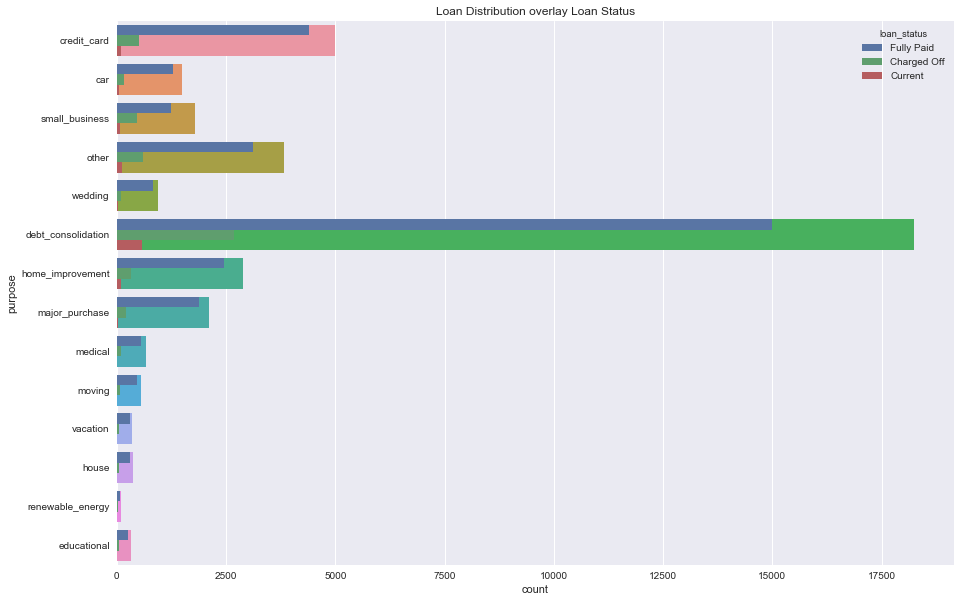

In [19]:
plt.figure(figsize=(15,10))
plt.title('Loan Distribution overlay Loan Status')
sns.countplot(y='purpose',data=loan_df_clean)
sns.countplot(y='purpose',hue='loan_status',data=loan_df_clean)
plt.show()

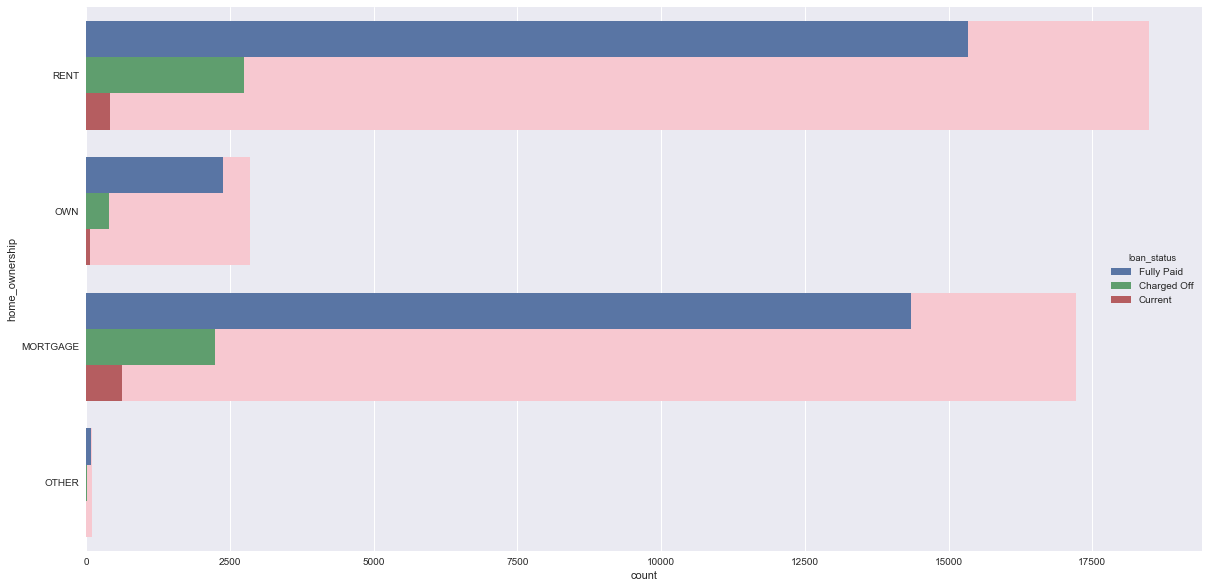

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(y='home_ownership',data=loan_df_clean,color="Pink")
sns.countplot(y='home_ownership',hue='loan_status',data=loan_df_clean)
plt.show()

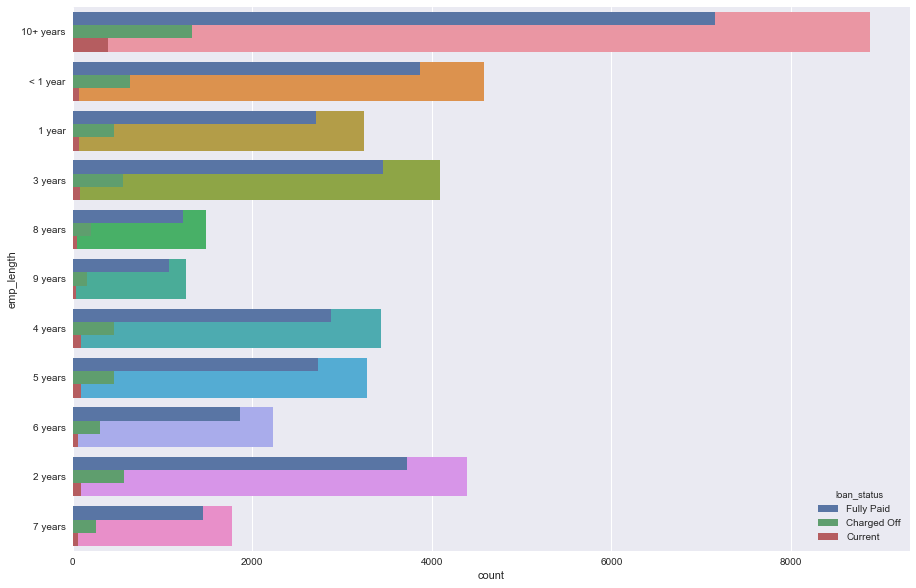

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',data=loan_df_clean)
sns.countplot(y='emp_length',hue='loan_status',data=loan_df_clean)
plt.show()

In [22]:
loan_access_factors_numeric=loan_df_clean.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate']]
plt.show()

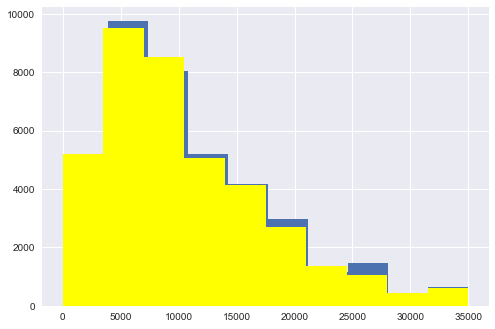

In [23]:
plt.hist(loan_df_clean.funded_amnt.dropna())
plt.hist(loan_df_clean.funded_amnt_inv.dropna(),color=sns.desaturate('yellow',1))
plt.show()

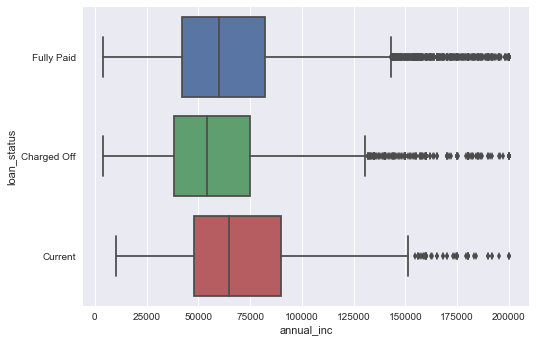

In [24]:
sns.boxplot(loan_df_clean[loan_df_clean['annual_inc']<=200000].annual_inc,y=loan_df_clean.loan_status,orient='h')
plt.show()

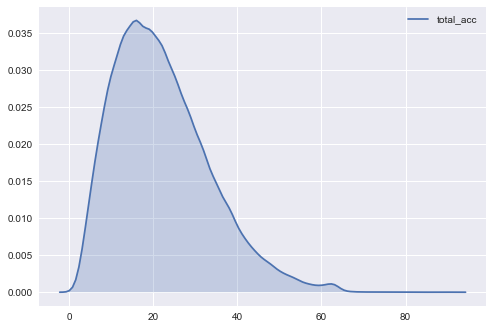

In [25]:
co_df=loan_df_clean[loan_df_clean['loan_status']=='Charged Off']
cu_df=loan_df_clean[loan_df_clean['loan_status']=='Current']
#co_df.shape
#cu_df.shape
sns.kdeplot(loan_df_clean.total_acc.dropna(),shade=True)
plt.show()

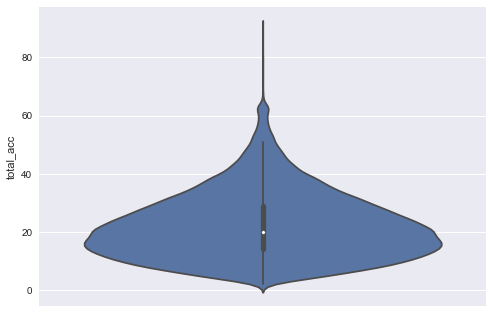

In [26]:
sns.violinplot(loan_df_clean.loc[:,'total_acc'],orient='v')
plt.show()

In [27]:
import datetime
loan_df_clean['issue_month']=loan_df_clean['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%b-%y').month)
loan_df_clean['issue_year']=loan_df_clean['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%b-%y').year)

In [28]:
year_change=loan_df_clean.pivot_table(index='loan_status',columns='issue_year', aggfunc='count').loc['Charged Off','loan_amnt']

In [29]:
year_change_reset=year_change.reset_index()
print(year_change_reset)
print(year_change)

   issue_year  Charged Off
0        2007         45.0
1        2008        247.0
2        2009        594.0
3        2010       1411.0
4        2011       3102.0
issue_year
2007      45.0
2008     247.0
2009     594.0
2010    1411.0
2011    3102.0
Name: Charged Off, dtype: float64


In [30]:
year_change_reset.index.name='sequence'

In [31]:
groupbySalary=loan_df_clean.groupby([pd.cut(loan_df_clean["annual_inc"], np.arange(loan_df_clean["annual_inc"].min(), loan_df_clean["annual_inc"].max(), 60000)),'loan_status'])
loan_status_bySal=pd.DataFrame(groupbySalary.loan_status.count().sort_values(ascending=False))
#loan_status_by_sal=pd.DataFrame(loan_df_clean.groupby('loan_status'))
loan_status_bySal.rename(columns={'loan_status':'loan_status_count'},inplace=True)
loan_status_bySal.reset_index(inplace=True)
print(loan_status_bySal.head())
complete_status_bySal=loan_status_bySal.copy()
loan_status_bySal=loan_status_bySal[loan_status_bySal['loan_status']=='Charged Off']
print(loan_status_bySal.head())
loan_status_bySal['percentage']=round(loan_status_bySal.loan_status_count/(loan_status_bySal.loan_status_count.sum()),4)*100

             annual_inc  loan_status  loan_status_count
0     (4000.0, 64000.0]   Fully Paid              17888
1   (64000.0, 124000.0]   Fully Paid              11601
2     (4000.0, 64000.0]  Charged Off               3450
3  (124000.0, 184000.0]   Fully Paid               1930
4   (64000.0, 124000.0]  Charged Off               1624
              annual_inc  loan_status  loan_status_count
2      (4000.0, 64000.0]  Charged Off               3450
4    (64000.0, 124000.0]  Charged Off               1624
8   (124000.0, 184000.0]  Charged Off                241
12  (184000.0, 244000.0]  Charged Off                 50
14  (244000.0, 304000.0]  Charged Off                 14


In [32]:
loan_status_bySal["annual_inc"].astype(str)

2          (4000.0, 64000.0]
4        (64000.0, 124000.0]
8       (124000.0, 184000.0]
12      (184000.0, 244000.0]
14      (244000.0, 304000.0]
21      (304000.0, 364000.0]
26      (484000.0, 544000.0]
27      (544000.0, 604000.0]
28      (604000.0, 664000.0]
29      (664000.0, 724000.0]
30      (364000.0, 424000.0]
38    (1204000.0, 1264000.0]
39      (784000.0, 844000.0]
41      (724000.0, 784000.0]
Name: annual_inc, dtype: object

In [33]:
loan_status_bySal.reset_index(inplace=True)
loan_status_bySal.drop('index',axis=1,inplace=True)

In [34]:
loan_status_bySal['annual_inc']=loan_status_bySal['annual_inc'].astype(str).str.strip('()[]')
loan_status_bySal['annual_inc']=loan_status_bySal['annual_inc'].apply(lambda x: x.replace(',','-'))
loan_status_bySal

,annual_inc,loan_status,loan_status_count,percentage
0,4000.0- 64000.0,Charged Off,3450,63.90
1,64000.0- 124000.0,Charged Off,1624,30.08
2,124000.0- 184000.0,Charged Off,241,4.46
3,184000.0- 244000.0,Charged Off,50,0.93
4,244000.0- 304000.0,Charged Off,14,0.26
5,304000.0- 364000.0,Charged Off,6,0.11
6,484000.0- 544000.0,Charged Off,3,0.06
7,544000.0- 604000.0,Charged Off,2,0.04
8,604000.0- 664000.0,Charged Off,2,0.04
9,664000.0- 724000.0,Charged Off,2,0.04


In [35]:
#loan_status_bySal['annual_inc']=loan_status_bySal['annual_inc'].astype(float)

In [36]:
#loan_status_bySal.sort_values(by='annual_inc',ascending=False)

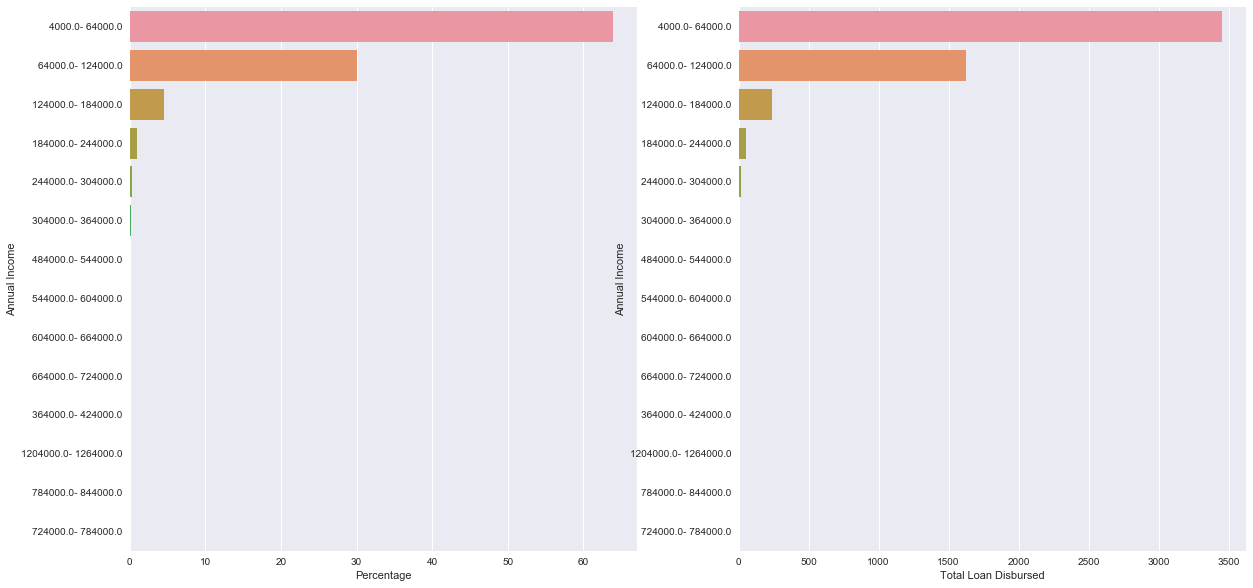

In [37]:
loan_status_bySal.describe()
plt.figure(figsize=(20,10))
plt.subplot(121)
ax1=sns.barplot(y='annual_inc', x='percentage', data=loan_status_bySal,orient='h')
ax1.set(xlabel='Percentage', ylabel='Annual Income')
plt.subplot(122)
ax2=sns.barplot(y="annual_inc", x="loan_status_count",  data=loan_status_bySal,orient='h');
ax2.set(xlabel='Total Loan Disbursed', ylabel='Annual Income')
#loan_status_bySal.percentage.plot()
plt.show()

In [44]:
groupbyEmpLen=loan_df_clean.groupby(['emp_length','loan_status'])
#average_charged_off_year=pd.DataFrame(groupbyEmpLen.annual_inc.mean().sort_values(ascending=False))
average_charged_off_year=pd.DataFrame(groupbyEmpLen.agg({'annual_inc':'count','annual_inc':'mean'}))
average_charged_off_year.rename(columns={'annual_inc':'annual_inc_mean'},inplace=True)
average_charged_off_year.reset_index(inplace=True)
average_charged_off_year=average_charged_off_year[average_charged_off_year['loan_status']=='Charged Off']
average_charged_off_year
#loan_df_clean['annual_inc'].unique())

,emp_length,loan_status,annual_inc_mean
0,1 year,Charged Off,54242.439211
3,10+ years,Charged Off,72578.473546
6,2 years,Charged Off,57409.903210
9,3 years,Charged Off,59601.141297
12,4 years,Charged Off,64417.025346
15,5 years,Charged Off,64249.784192
18,6 years,Charged Off,66101.841694
21,7 years,Charged Off,62575.109810
24,8 years,Charged Off,67778.180099
27,9 years,Charged Off,67041.580759


In [68]:
year_proportion=pd.DataFrame(groupbyEmpLen.agg({'annual_inc':'count'}))

In [69]:
year_proportion.rename(columns={'annual_inc':'loan_count'},inplace=True)
year_proportion.reset_index(inplace=True)

   emp_length  loan_status  loan_count  total_loan  percentage
0      1 year  Charged Off         456        3240        14.0
3   10+ years  Charged Off        1331        8879        15.0
6     2 years  Charged Off         567        4388        13.0
9     3 years  Charged Off         555        4095        14.0
12    4 years  Charged Off         462        3436        13.0
15    5 years  Charged Off         458        3281        14.0
18    6 years  Charged Off         307        2229        14.0
21    7 years  Charged Off         263        1773        15.0
24    8 years  Charged Off         203        1479        14.0
27    9 years  Charged Off         158        1258        13.0
30   < 1 year  Charged Off         639        4581        14.0


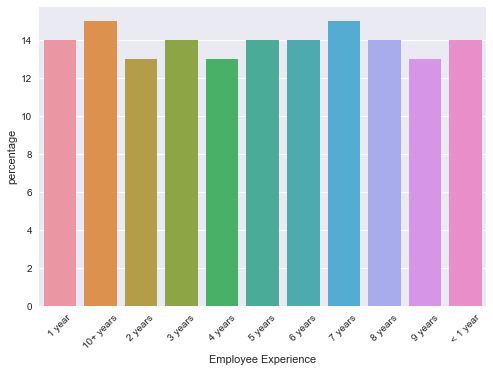

In [103]:

year_proportion_bkp=year_proportion.copy()
temp=pd.DataFrame(year_proportion.groupby('emp_length').loan_count.sum())
temp.rename(columns={'loan_count':'total_loan'},inplace=True)
temp.reset_index(inplace=True)
temp.head()
merged_df=pd.merge(year_proportion,temp, on='emp_length', how='inner')
merged_df['percentage']=round(merged_df['loan_count']/merged_df['total_loan'],2)*100
merged_df=merged_df[merged_df['loan_status']=='Charged Off']
print(merged_df)
ax=sns.barplot(y=merged_df['percentage'],x=merged_df['emp_length'])
ax.set(ylabel='percentage',xlabel='Employee Experience')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

In [20]:
print("the number of open accounts impacts a borrower’s credit score")

the number of open accounts impacts a borrower’s credit score


In [87]:
loan_df_clean['int_rate']=loan_df_clean['int_rate'].apply(lambda x:x.replace('%',''))
loan_df_clean['int_rate']=loan_df_clean['int_rate'].astype(float)


AttributeError: 'float' object has no attribute 'replace'

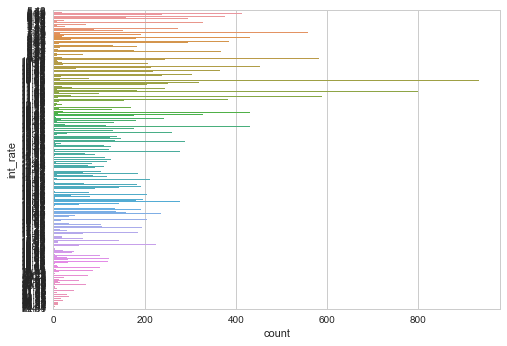

In [90]:
sns.countplot(y=loan_df_clean.int_rate)
plt.show()

In [91]:
loan_df_clean.loc[:,'open_acc']
loan_df_CO=loan_df_clean[loan_df_clean['loan_status']=='Charged Off']
loan_df_CO.loc[:,['loan_status','open_acc','int_rate']][:10]

,loan_status,open_acc,int_rate
1,Charged Off,3,15.27
8,Charged Off,11,21.28
9,Charged Off,2,12.69
12,Charged Off,4,13.49
14,Charged Off,14,10.65
21,Charged Off,7,12.42
24,Charged Off,7,11.71
26,Charged Off,7,14.27
27,Charged Off,14,16.77
46,Charged Off,17,8.90


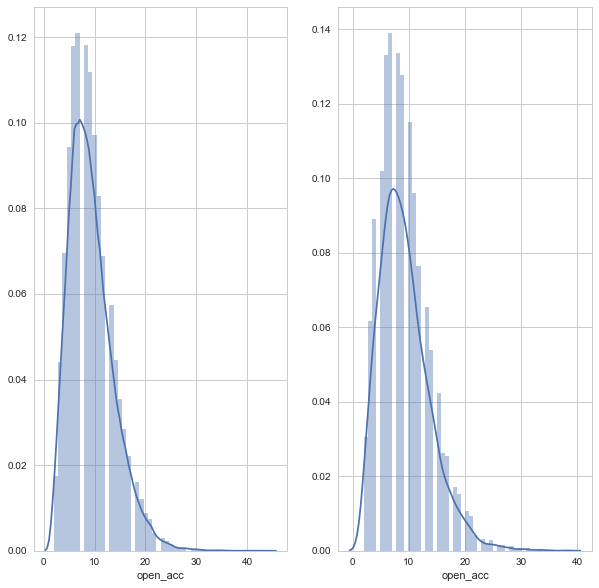

In [149]:
gp=loan_df_clean.groupby([pd.cut(loan_df_clean["open_acc"], np.arange(0, 50, 2)),'loan_status'])
df=pd.DataFrame(gp.agg({'loan_status':'count','int_rate':'mean'}))

In [150]:
df

loan_status   int_rate
open_acc loan_status                        
(0, 2]   Charged Off          119  15.037395
         Current                9  16.312222
         Fully Paid           436  13.347844
(2, 4]   Charged Off          586  14.581348
         Current               60  16.001500
         Fully Paid          3037  12.751831
(4, 6]   Charged Off          913  13.502618
         Current              166  14.944578
         Fully Paid          5810  11.407408
(6, 8]   Charged Off         1059  13.592238
         Current              222  14.844054
         Fully Paid          6479  11.301406
(8, 10]  Charged Off          943  13.546182
         Current              228  14.871140
         Fully Paid          5610  11.434103
(10, 12] Charged Off          670  14.086821
         Current              149  14.924094
         Fully Paid          4104  11.528287
(12, 14] Charged Off          463  13.983240
         Current              113  15.423097
         Fully Paid          2734  11.591017
(14, 16] Charged Off          267  13.578689
         Current               62  15.688548
         Fully Paid          1747  11.601156
(16, 18] Charged Off          166  14.200602
         Current               42  13.928810
         Fully Paid          1033  11.601065
(18, 20] Charged Off          100  14.127900
         Current               19  15.050000
         Fully Paid           558  11.756649
(20, 22] Charged Off           53  13.902075
         Current               15  16.388000
         Fully Paid           307  12.002378
(22, 24] Charged Off           20  15.025000
         Current                9  18.136667
         Fully Paid           142  13.863521
(24, 26] Charged Off           17  19.301765
         Current                2  20.290000
         Fully Paid            65  17.152615
(26, 28] Charged Off           11  19.362727
         Current                1  23.910000
         Fully Paid            35  18.252571
(28, 30] Charged Off            4  19.567500
         Fully Paid            24  17.922083
(30, 32] Charged Off            3  16.100000
         Current                1  21.670000
         Fully Paid             7  16.044286
(32, 34] Charged Off            3  21.173333
         Fully Paid             5  18.212000
(34, 36] Charged Off            1  20.250000
         Fully Paid             5  14.832000
(36, 38] Charged Off            1  21.590000
(38, 40] Fully Paid             1  20.990000
(40, 42] Fully Paid             2   7.555000
(42, 44] Fully Paid             1  20.860000

In [151]:
df.rename(columns={'loan_status':'loan_app_count'},inplace=True)
df.reset_index(inplace=True)
df['open_acc']=df['open_acc'].astype(str).str.strip('()[]')
df['open_acc']=df['open_acc'].apply(lambda x: x.replace(',','-'))

In [152]:
df.head()

,open_acc,loan_status,loan_app_count,int_rate
0,0- 2,Charged Off,119,15.037395
1,0- 2,Current,9,16.312222
2,0- 2,Fully Paid,436,13.347844
3,2- 4,Charged Off,586,14.581348
4,2- 4,Current,60,16.001500


In [153]:
df_pivot=pd.pivot_table(df,values='loan_app_count', columns='loan_status',index='open_acc',aggfunc='sum')
df_pivot.head()

loan_status,Charged Off,Current,Fully Paid
open_acc,,,
0- 2,119.0,9.0,436.0
10- 12,670.0,149.0,4104.0
12- 14,463.0,113.0,2734.0
14- 16,267.0,62.0,1747.0
16- 18,166.0,42.0,1033.0


In [154]:
df_CO=df[(df['loan_status']=='Charged Off')]
df_FP=df[(df['loan_status']=='Fully Paid')]

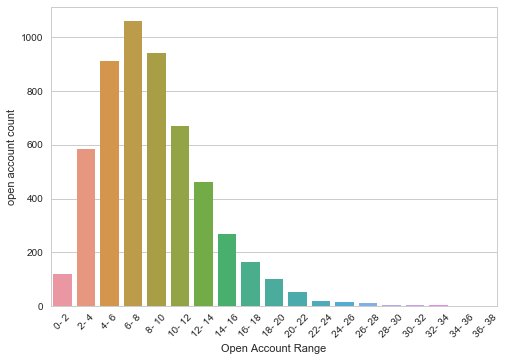

In [159]:
ax=sns.barplot(y=df_CO['loan_app_count'],x=df_CO['open_acc'])
#ax=sns.barplot(y=df_CO['int_rate'],x=df_CO['open_acc'])
ax.set(ylabel='open account count',xlabel='Open Account Range')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

In [156]:
#df_pivot.reset_index(inplace=True)
df_pivot

loan_status,Charged Off,Current,Fully Paid
open_acc,,,
0- 2,119.0,9.0,436.0
10- 12,670.0,149.0,4104.0
12- 14,463.0,113.0,2734.0
14- 16,267.0,62.0,1747.0
16- 18,166.0,42.0,1033.0
18- 20,100.0,19.0,558.0
2- 4,586.0,60.0,3037.0
20- 22,53.0,15.0,307.0
22- 24,20.0,9.0,142.0


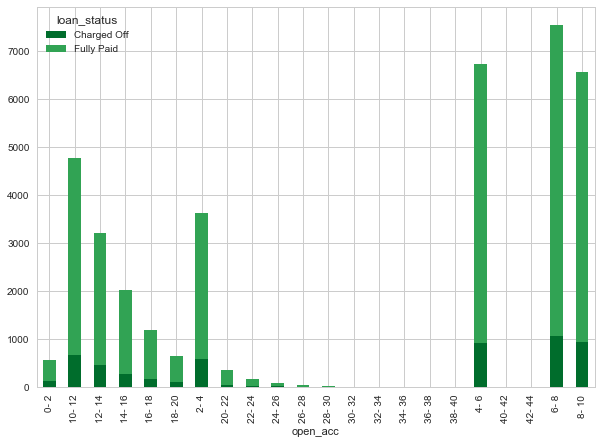

In [157]:
colors = ["#006D2C", "#31A354","#74C476"]
df_pivot.loc[:,['Charged Off','Fully Paid']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.show()

In [128]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

In [ ]:
df=pd.DataFrame(loan_df_clean.groupby([pd.cut(loan_df_clean["open_acc"], np.arange(0, 40, 10))]).loan_status.count().sort_values(ascending=False))